In [1]:
from pyspark.sql import *
from pyspark.sql.functions import *
import pandas as pd

In [2]:
sqlContext = SQLContext(sc)

In [3]:
df = sqlContext.read.load('file:///home/cloudera/Downloads/big-data-4/daily_weather.csv',
                          format = 'com.databricks.spark.csv',
                          header = 'true',
                          inferSchema = 'true')

In [4]:
df.columns

['number',
 'air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am',
 'relative_humidity_9am',
 'relative_humidity_3pm']

In [5]:
df.describe('avg_wind_speed_9am').show()

+-------+------------------+
|summary|avg_wind_speed_9am|
+-------+------------------+
|  count|              1092|
|   mean|  5.50828424225493|
| stddev| 4.552813465531715|
|    min|  0.69345139999974|
|    max|23.554978199999763|
+-------+------------------+



In [6]:
df.describe('rain_accumulation_9am').show()

+-------+---------------------+
|summary|rain_accumulation_9am|
+-------+---------------------+
|  count|                 1089|
|   mean|  0.20307895225211126|
| stddev|   1.5939521253574904|
|    min|                  0.0|
|    max|    24.01999999999907|
+-------+---------------------+



In [7]:
df.count() 

1095

In [8]:
df.stat.corr('relative_humidity_9am','relative_humidity_3pm')

0.883074190979391

In [9]:
df.describe('max_wind_speed_9am').show()

+-------+------------------+
|summary|max_wind_speed_9am|
+-------+------------------+
|  count|              1091|
|   mean| 7.019513529175272|
| stddev|  5.59820917078096|
|    min|1.1855782000000479|
|    max| 29.84077959999996|
+-------+------------------+



In [10]:
df.select('max_wind_direction_9am', 'max_wind_speed_9am').filter("max_wind_speed_9am > 29").show()

+----------------------+------------------+
|max_wind_direction_9am|max_wind_speed_9am|
+----------------------+------------------+
|      67.9999999999999| 29.84077959999996|
+----------------------+------------------+



In [11]:
import matplotlib.pyplot as plt
# Show histogram of the 'C1' column
bins, counts = df.select('air_temp_9am').rdd.flatMap(lambda x: x).histogram(50)

# This is a bit awkward but I believe this is the correct way to do it 
plt.hist(bins[:-1], bins=bins, weights=counts)

(array([  3.,   3.,   7.,   7.,  11.,   7.,  14.,  18.,  24.,  23.,  31.,
         20.,  15.,  28.,  18.,  24.,  33.,  34.,  38.,  43.,  43.,  40.,
         48.,  43.,  34.,  61.,  49.,  32.,  37.,  50.,  55.,  34.,  34.,
         22.,  29.,  13.,  22.,   9.,  10.,   9.,   8.,   1.,   3.,   2.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 36.752  ,  37.99508,  39.23816,  40.48124,  41.72432,  42.9674 ,
         44.21048,  45.45356,  46.69664,  47.93972,  49.1828 ,  50.42588,
         51.66896,  52.91204,  54.15512,  55.3982 ,  56.64128,  57.88436,
         59.12744,  60.37052,  61.6136 ,  62.85668,  64.09976,  65.34284,
         66.58592,  67.829  ,  69.07208,  70.31516,  71.55824,  72.80132,
         74.0444 ,  75.28748,  76.53056,  77.77364,  79.01672,  80.2598 ,
         81.50288,  82.74596,  83.98904,  85.23212,  86.4752 ,  87.71828,
         88.96136,  90.20444,  91.44752,  92.6906 ,  93.93368,  95.17676,
         96.41984,  97.66292,  98.906  ]),
 <a list of 50 Patch ob

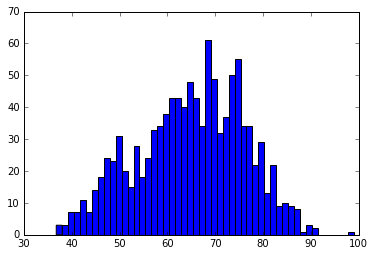

In [12]:
plt.show()

In [13]:
print('57')

57


In [14]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
number,1095,547.0,316.24357700987383,0,1094
air_pressure_9am,1092,918.8825513138097,3.1841611803868353,907.9900000000024,929.3200000000012
air_temp_9am,1090,64.93300141287075,11.175514003175877,36.752000000000685,98.90599999999992
avg_wind_direction_9am,1091,142.23551070057584,69.13785928889183,15.500000000000046,343.4
avg_wind_speed_9am,1092,5.50828424225493,4.552813465531715,0.69345139999974,23.554978199999763
max_wind_direction_9am,1092,148.9535179651692,67.23801294602951,28.89999999999991,312.19999999999993
max_wind_speed_9am,1091,7.019513529175272,5.59820917078096,1.1855782000000479,29.84077959999996
rain_accumulation_9am,1089,0.20307895225211126,1.5939521253574904,0.0,24.01999999999907
rain_duration_9am,1092,294.1080522756142,1598.078778660148,0.0,17704.0


In [15]:
inputeDF=df

In [16]:
removeAllDF=df.na.drop()
diff=df.count()-removeAllDF.count()
print("i removed {} rows".format(diff))

i removed 31 rows


In [17]:
for x in inputeDF.columns:
    meanValue = removeAllDF.agg(avg(x)).first()[0]
    print(x, meanValue)
    inputeDF = inputeDF.na.fill(meanValue, [x])

number 545.0018796992481
air_pressure_9am 918.9031798641055
air_temp_9am 65.02260949558739
avg_wind_direction_9am 142.30675564934032
avg_wind_speed_9am 5.485793050713691
max_wind_direction_9am 148.48042413321312
max_wind_speed_9am 6.9997136588756925
rain_accumulation_9am 0.18202347650615522
rain_duration_9am 266.3936973996038
relative_humidity_9am 34.07743985327712
relative_humidity_3pm 35.14838093290537


In [18]:
#Quiz1: If we remove all missing values from the data, 
#how many air pressure at 9am measurements have values between 911.736 and 914.67?

removeAllDF \
.filter(removeAllDF.air_pressure_9am>=911.736) \
.filter(removeAllDF.air_pressure_9am<=914.67) \
.agg(count(removeAllDF.air_pressure_9am)) \
.show()

+-----------------------+
|count(air_pressure_9am)|
+-----------------------+
|                     77|
+-----------------------+



In [19]:
#If we impute the missing values with the minimum value, 
#how many air temperature at 9am measurements are less than 42.292?

inputeDF2=df.select('air_temp_9am')

for x in inputeDF2.columns:
    meanValue = removeAllDF.agg(min(x)).first()[0]
    print(x, meanValue)
    inputeDF2 = inputeDF2.na.fill(meanValue, [x])
    
inputeDF2.filter(inputeDF2.air_temp_9am<42.292).count()

air_temp_9am 36.752000000000685


28

In [20]:
#Quiz3: How many samples have missing values for air_pressure_9am?

df1=df.describe('air_pressure_9am')
df2=inputeDF.describe('air_pressure_9am')

df3=df1.join(df2,df1.summary==df2.summary)

df3.select(
    df1.summary,
    df1.air_pressure_9am,
    df2.air_pressure_9am,(df2.air_pressure_9am-df1.air_pressure_9am).alias('diff')
).filter(
    df1.summary=='count'
).show()

+-------+----------------+----------------+----+
|summary|air_pressure_9am|air_pressure_9am|diff|
+-------+----------------+----------------+----+
|  count|            1092|            1095| 3.0|
+-------+----------------+----------------+----+



In [21]:
#Quiz4: Which column in the weather dataset has the most number of missing values?

nullsDF=df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
nullsDF.toPandas().transpose().sort_values(by=0, ascending=False).head(1)

,0
rain_accumulation_9am,6


In [22]:
# exploring dictionary to df

d = {}

for x in nullsDF.columns:
    y = nullsDF.agg(max(x)).first()[0]
    d[x] = y
    
#pd.DataFrame.from_dict(d, orient='index', columns=['Amount']).sort_values(by=['Amount'], ascending=False)

In [23]:
# When we remove all the missing values from the dataset, 
#the number of rows is 1064, yet the variable with most missing values has 1089 rows. 
#Why did the number of rows decrease so much?

print('Because the missing values in each column are not necessarily in the same row')

Because the missing values in each column are not necessarily in the same row
